### APE on average InfoNCE loss across all combinations

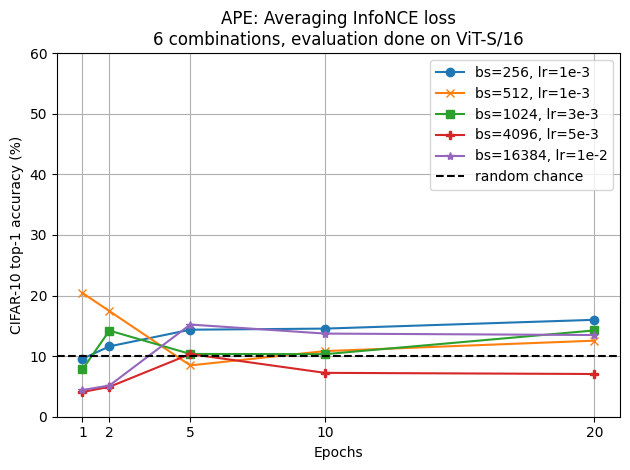

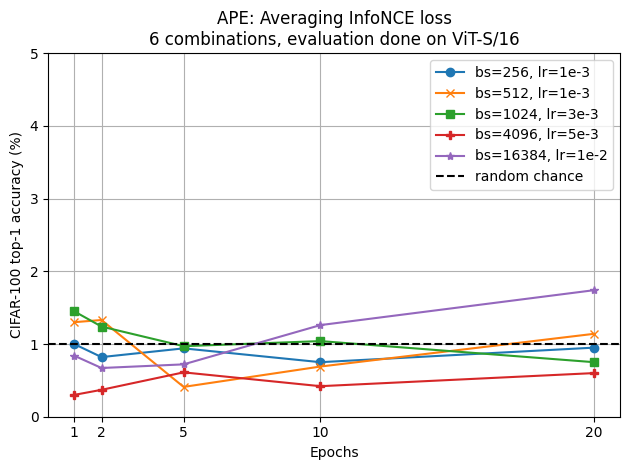

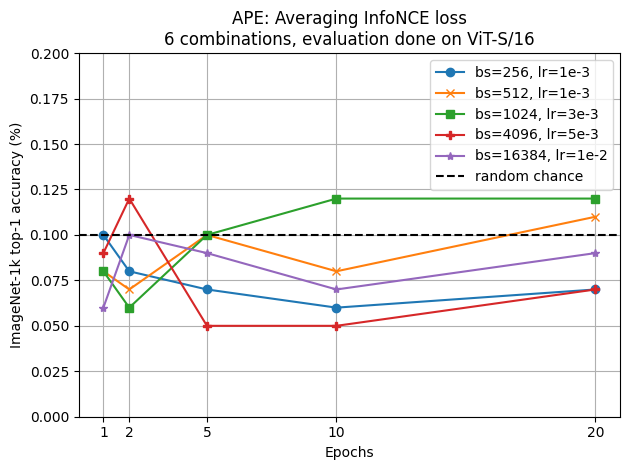

In [35]:
from pylab import plt

data_256 = {'exp_name': 'vits_bs-256_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 9.56, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_2': {'cifar10': 11.61, 'cifar100': 0.82, 'imagenet1k': 0.08}, 'epoch_5': {'cifar10': 14.36, 'cifar100': 0.94, 'imagenet1k': 0.07}, 'epoch_10': {'cifar10': 14.54, 'cifar100': 0.75, 'imagenet1k': 0.06}, 'epoch_20': {'cifar10': 15.99, 'cifar100': 0.95, 'imagenet1k': 0.07}}}
data_512 = {'exp_name': 'vits_bs-512_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 20.42, 'cifar100': 1.3, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 17.43, 'cifar100': 1.33, 'imagenet1k': 0.07}, 'epoch_5': {'cifar10': 8.47, 'cifar100': 0.41, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.83, 'cifar100': 0.69, 'imagenet1k': 0.08}, 'epoch_20': {'cifar10': 12.55, 'cifar100': 1.14, 'imagenet1k': 0.11}}}
data_1024 = {'exp_name': 'vits_bs-1024_lr-0.003', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 7.83, 'cifar100': 1.45, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 14.21, 'cifar100': 1.24, 'imagenet1k': 0.06}, 'epoch_5': {'cifar10': 10.36, 'cifar100': 0.97, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.32, 'cifar100': 1.04, 'imagenet1k': 0.12}, 'epoch_20': {'cifar10': 14.24, 'cifar100': 0.75, 'imagenet1k': 0.12}}}
data_4096 = {'exp_name': 'vits_bs-4096_lr-0.005', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.08, 'cifar100': 0.3, 'imagenet1k': 0.09}, 'epoch_2': {'cifar10': 4.93, 'cifar100': 0.37, 'imagenet1k': 0.12}, 'epoch_5': {'cifar10': 10.34, 'cifar100': 0.61, 'imagenet1k': 0.05}, 'epoch_10': {'cifar10': 7.24, 'cifar100': 0.42, 'imagenet1k': 0.05}, 'epoch_20': {'cifar10': 7.05, 'cifar100': 0.6, 'imagenet1k': 0.07}}}
data_16384 = {'exp_name': 'vits_bs-16384_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.41, 'cifar100': 0.84, 'imagenet1k': 0.06}, 'epoch_2': {'cifar10': 5.15, 'cifar100': 0.67, 'imagenet1k': 0.1}, 'epoch_5': {'cifar10': 15.21, 'cifar100': 0.72, 'imagenet1k': 0.09}, 'epoch_10': {'cifar10': 13.72, 'cifar100': 1.26, 'imagenet1k': 0.07}, 'epoch_20': {'cifar10': 13.48, 'cifar100': 1.74, 'imagenet1k': 0.09}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 60.0], "cifar100": [0.0, 5.0], "imagenet1k": [0.0, 0.2]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in benchmarks:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    # plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=1e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-3")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=3e-3")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=5e-3")
    plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=1e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'APE: Averaging InfoNCE loss\n6 combinations, evaluation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.savefig('imagenet_accuracy_plot.png')
    plt.show()

### Full MLP H-Net (`num_ie=12`, `encoder_batch_size=4`) Batch ablation

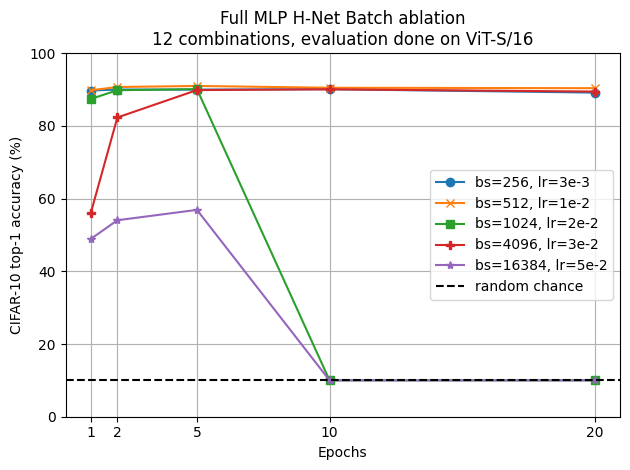

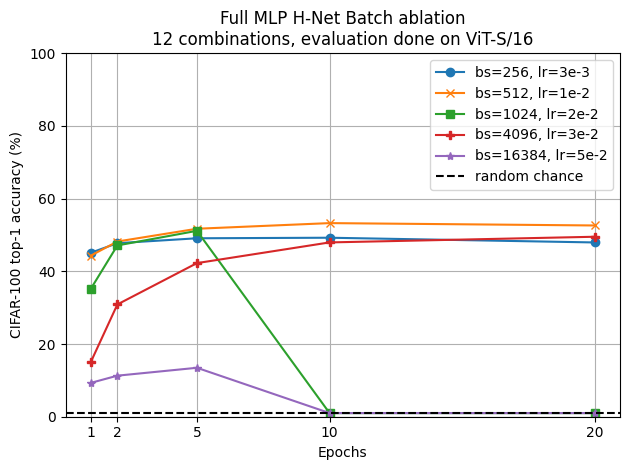

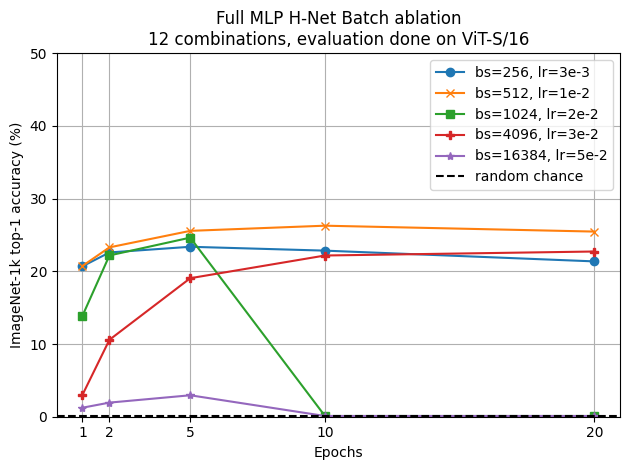

In [28]:
from pylab import plt


data_256 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-256_lr-3e-3', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.71, 'cifar100': 45.1, 'imagenet1k': 20.69}, 'epoch_2': {'cifar10': 89.99, 'cifar100': 47.73, 'imagenet1k': 22.59}, 'epoch_5': {'cifar10': 89.97, 'cifar100': 49.08, 'imagenet1k': 23.37}, 'epoch_10': {'cifar10': 90.08, 'cifar100': 49.23, 'imagenet1k': 22.84}, 'epoch_20': {'cifar10': 89.15, 'cifar100': 47.93, 'imagenet1k': 21.36}}}
data_512 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
data_1024 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-1024_lr-2e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 87.4, 'cifar100': 35.19, 'imagenet1k': 13.89}, 'epoch_2': {'cifar10': 89.8, 'cifar100': 47.11, 'imagenet1k': 22.18}, 'epoch_5': {'cifar10': 90.1, 'cifar100': 51.13, 'imagenet1k': 24.63}, 'epoch_10': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_20': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}}}
data_4096 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-4096_lr-3e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 56.09, 'cifar100': 15.07, 'imagenet1k': 3.02}, 'epoch_2': {'cifar10': 82.3, 'cifar100': 30.88, 'imagenet1k': 10.58}, 'epoch_5': {'cifar10': 89.84, 'cifar100': 42.25, 'imagenet1k': 19.05}, 'epoch_10': {'cifar10': 90.05, 'cifar100': 47.94, 'imagenet1k': 22.17}, 'epoch_20': {'cifar10': 89.43, 'cifar100': 49.5, 'imagenet1k': 22.72}}} 
data_16384 = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-16384_lr-5e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 48.91, 'cifar100': 9.31, 'imagenet1k': 1.24}, 'epoch_2': {'cifar10': 54.04, 'cifar100': 11.29, 'imagenet1k': 1.94}, 'epoch_5': {'cifar10': 56.89, 'cifar100': 13.46, 'imagenet1k': 2.95}, 'epoch_10': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_20': {'cifar10': 10.0, 'cifar100': 1.0, 'imagenet1k': 0.1}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 50]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in benchmarks:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    # plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=3e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-2")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=2e-2")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=3e-2")
    plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=5e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'Full MLP H-Net Batch ablation\n12 combinations, evaluation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.savefig('imagenet_accuracy_plot.png')
    plt.show()


### Full MLP H-Net (`num_ie=12` `encoder_batch_size=4`) v/s APE

- One target model ViT-S/16
- Assume that APE was run for 12 combinations as well
- Take best h-params for both H-Net (`bs=512`, `lr=1e-2`) and APE (`bs=16384`, `lr=1e-2`)

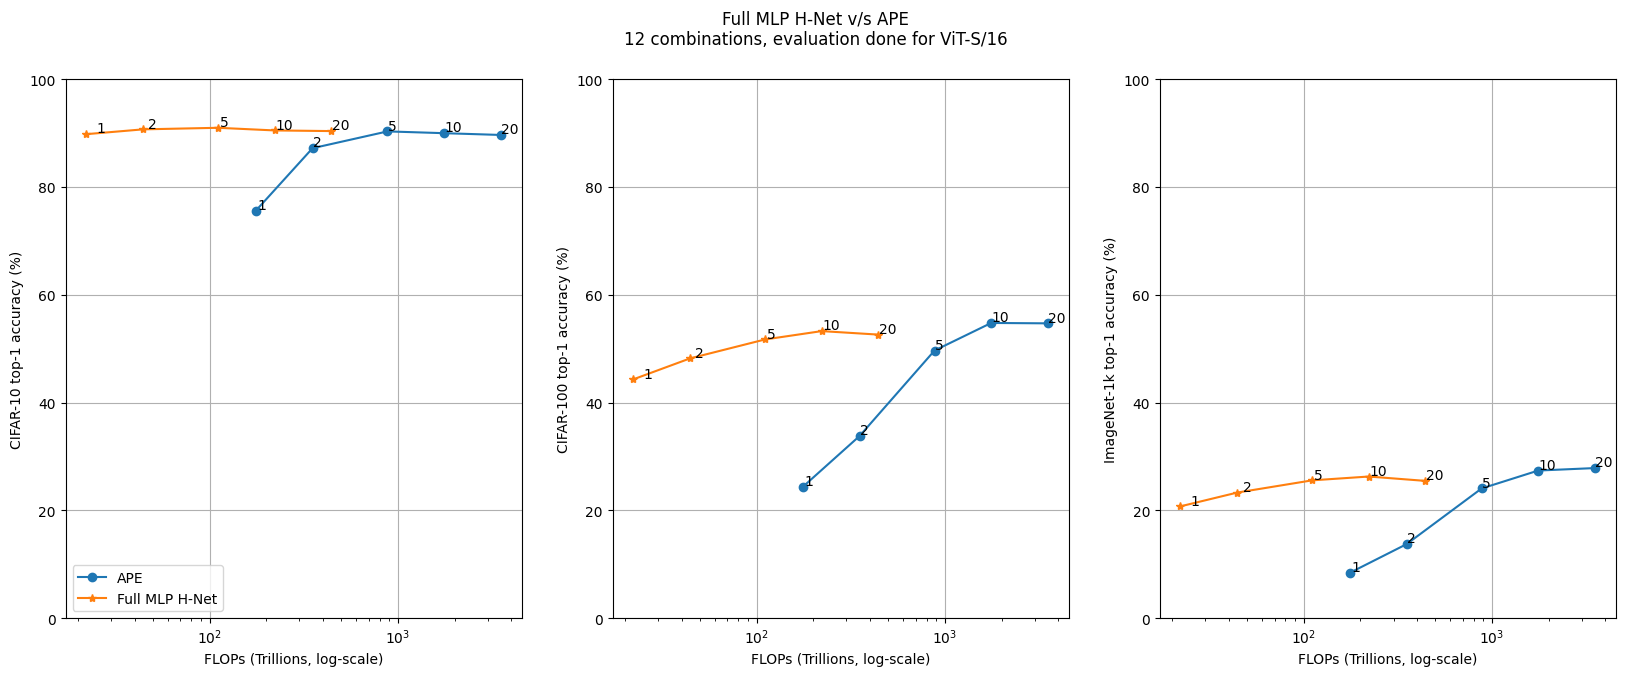

In [19]:
from pylab import plt

hnet = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
ape = {'exp_name': 'vit_small_patch16_224_sentence-t5-base', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 75.59, 'cifar100': 24.37, 'imagenet1k': 8.42}, 'epoch_2': {'cifar10': 87.18, 'cifar100': 33.79, 'imagenet1k': 13.73}, 'epoch_5': {'cifar10': 90.3, 'cifar100': 49.64, 'imagenet1k': 24.05}, 'epoch_10': {'cifar10': 89.97, 'cifar100': 54.76, 'imagenet1k': 27.38}, 'epoch_20': {'cifar10': 89.64, 'cifar100': 54.69, 'imagenet1k': 27.84}}}


benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 100]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}
epochs = [1, 2, 5, 10, 20]

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

for j, bench in enumerate(benchmarks):
    hnet_accs = [hnet["eval"][f"epoch_{e}"][bench] for e in [1, 2, 5, 10, 20]]
    hnet_flops = [22.165 * e for e in [1, 2, 5, 10, 20]]

    ape_accs = [ape["eval"][f"epoch_{e}"][bench] for e in [1, 2, 5, 10, 20]]
    ape_flops = [14.675 * e * 12 for e in [1, 2, 5, 10, 20]]

    axes[j].plot(ape_flops, ape_accs, label="APE", marker="o")
    axes[j].plot(hnet_flops, hnet_accs, label="Full MLP H-Net", marker="*")
    axes[j].set_xlabel("FLOPs (Trillions, log-scale)")
    axes[j].set_xscale("log")
    axes[j].set_ylabel(f"{names[bench]} top-1 accuracy (%)")
    axes[j].set_ylim(lims[bench])
    
    if j == 0:
        axes[j].legend()
    
    axes[j].grid(True)

    epochs = [1, 2, 5, 10, 20]
    for i, ep in enumerate(epochs):
        axes[j].annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
        axes[j].annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.suptitle("Full MLP H-Net v/s APE\n12 combinations, evaluation done for ViT-S/16")

plt.show()


### Changing (scale of) text encoders

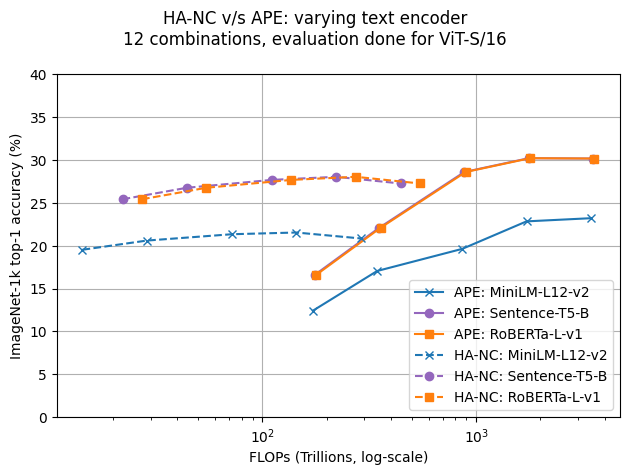

In [73]:
from pylab import plt

ape_minilm = {'exp_name': 'vit_small_patch16_224_all-MiniLM-L12-v2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 86.1, 'cifar100': 36.26, 'imagenet1k': 12.41}, 'epoch_2': {'cifar10': 89.33, 'cifar100': 43.29, 'imagenet1k': 17.05}, 'epoch_5': {'cifar10': 89.48, 'cifar100': 46.8, 'imagenet1k': 19.63}, 'epoch_10': {'cifar10': 89.07, 'cifar100': 48.9, 'imagenet1k': 22.84}, 'epoch_20': {'cifar10': 88.62, 'cifar100': 49.27, 'imagenet1k': 23.21}}}
ape_st5b = {'exp_name': 'vit_small_patch16_224_sentence-t5-base', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 75.59, 'cifar100': 24.37, 'imagenet1k': 8.42}, 'epoch_2': {'cifar10': 87.18, 'cifar100': 33.79, 'imagenet1k': 13.73}, 'epoch_5': {'cifar10': 90.3, 'cifar100': 49.64, 'imagenet1k': 24.05}, 'epoch_10': {'cifar10': 89.97, 'cifar100': 54.76, 'imagenet1k': 27.38}, 'epoch_20': {'cifar10': 89.64, 'cifar100': 54.69, 'imagenet1k': 27.84}}}
ape_roberta = {'exp_name': 'vit_small_patch16_224_all-roberta-large-v1', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 87.06, 'cifar100': 43.23, 'imagenet1k': 16.61}, 'epoch_2': {'cifar10': 88.56, 'cifar100': 49.4, 'imagenet1k': 22.1}, 'epoch_5': {'cifar10': 89.55, 'cifar100': 51.91, 'imagenet1k': 28.6}, 'epoch_10': {'cifar10': 90.62, 'cifar100': 54.96, 'imagenet1k': 30.21}, 'epoch_20': {'cifar10': 90.02, 'cifar100': 54.89, 'imagenet1k': 30.17}}}

hnet_minilm = {'exp_name': 'allMiniLM_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 88.85, 'cifar100': 43.99, 'imagenet1k': 19.53}, 'epoch_2': {'cifar10': 89.07, 'cifar100': 46.19, 'imagenet1k': 20.6}, 'epoch_5': {'cifar10': 88.78, 'cifar100': 47.81, 'imagenet1k': 21.34}, 'epoch_10': {'cifar10': 88.0, 'cifar100': 48.2, 'imagenet1k': 21.54}, 'epoch_20': {'cifar10': 87.52, 'cifar100': 48.01, 'imagenet1k': 20.85}}}
hnet_st5b = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
hnet_roberta = {'exp_name': 'roberta_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.69, 'cifar100': 49.36, 'imagenet1k': 25.42}, 'epoch_2': {'cifar10': 90.85, 'cifar100': 51.43, 'imagenet1k': 26.76}, 'epoch_5': {'cifar10': 90.68, 'cifar100': 52.74, 'imagenet1k': 27.68}, 'epoch_10': {'cifar10': 89.5, 'cifar100': 53.51, 'imagenet1k': 28.04}, 'epoch_20': {'cifar10': 89.99, 'cifar100': 52.14, 'imagenet1k': 27.26}}}


benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 40]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}
epochs = [1, 2, 5, 10, 20]

fig, axes = plt.subplots(1, 1)

for j, bench in enumerate(["imagenet1k"]):
    ape_acc1 = [ape_minilm["eval"][f"epoch_{e}"][bench] for e in epochs]
    ape_flops1 = [14.34 * e * 12 for e in epochs]

    ape_acc2 = [ape_st5b["eval"][f"epoch_{e}"][bench] for e in epochs]
    ape_flops2 = [14.676 * e * 12 for e in epochs]

    ape_acc3 = [ape_roberta["eval"][f"epoch_{e}"][bench] for e in epochs]
    ape_flops3 = [14.895 * e * 12 for e in epochs]


    hnet_acc1 = [hnet_minilm["eval"][f"epoch_{e}"][bench] for e in epochs]
    hnet_flops1 = [14.4 * e for e in epochs]

    hnet_acc2 = [hnet_st5b["eval"][f"epoch_{e}"][bench] for e in epochs]
    hnet_flops2 = [22.165 * e for e in epochs]

    hnet_acc3 = [hnet_roberta["eval"][f"epoch_{e}"][bench] for e in epochs]
    hnet_flops3 = [27.34 * e for e in epochs]

    axes.plot(ape_flops1, ape_acc1, color="tab:blue", marker="x", label="APE: MiniLM-L12-v2")
    axes.plot(ape_flops2, ape_acc3, color="tab:purple", marker="o", label="APE: Sentence-T5-B")
    axes.plot(ape_flops3, ape_acc3, color="tab:orange", marker="s", label="APE: RoBERTa-L-v1")


    axes.plot(hnet_flops1, hnet_acc1, color="tab:blue", linestyle="--", marker="x", label="HA-NC: MiniLM-L12-v2")
    axes.plot(hnet_flops2, hnet_acc3, color="tab:purple", linestyle="--", marker="o", label="HA-NC: Sentence-T5-B")
    axes.plot(hnet_flops3, hnet_acc3, color="tab:orange", linestyle="--", marker="s", label="HA-NC: RoBERTa-L-v1")

    # plt.axhline(rcs[bench], linestyle="--", color="black", label="random chance")

    if j == 0:
        axes.legend(loc="lower right", )
    axes.set_ylim(lims[bench])
    axes.set_ylabel(f"{names[bench]} top-1 accuracy (%)")
    axes.set_xscale("log")
    axes.set_xlabel("FLOPs (Trillions, log-scale)")
    axes.grid(True)

plt.suptitle("HA-NC v/s APE: varying text encoder\n12 combinations, evaluation done for ViT-S/16")
plt.tight_layout()
plt.savefig("final_plots/vary_te.pdf", dpi=300, format="pdf")
plt.show()



### Changing training dataset scale

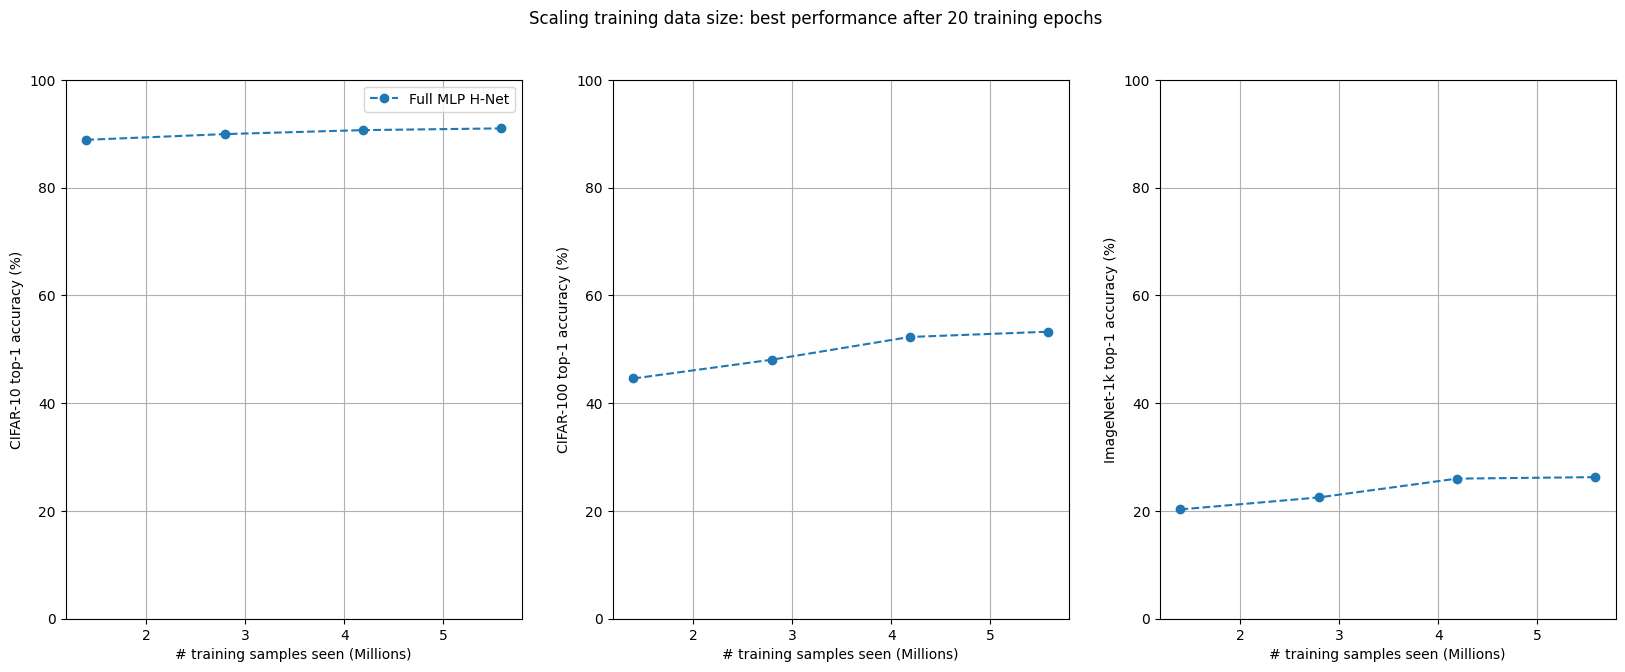

In [28]:

from pylab import plt

ape_full = {'exp_name': 'vit_small_patch16_224_sentence-t5-base', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 75.59, 'cifar100': 24.37, 'imagenet1k': 8.42}, 'epoch_2': {'cifar10': 87.18, 'cifar100': 33.79, 'imagenet1k': 13.73}, 'epoch_5': {'cifar10': 90.3, 'cifar100': 49.64, 'imagenet1k': 24.05}, 'epoch_10': {'cifar10': 89.97, 'cifar100': 54.76, 'imagenet1k': 27.38}, 'epoch_20': {'cifar10': 89.64, 'cifar100': 54.69, 'imagenet1k': 27.84}}}
ape_3_4 = {'exp_name': 'three-fourth_vits_default_ape', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 65.77, 'cifar100': 20.21, 'imagenet1k': 6.51}, 'epoch_2': {'cifar10': 79.38, 'cifar100': 28.03, 'imagenet1k': 10.78}, 'epoch_5': {'cifar10': 89.96, 'cifar100': 44.12, 'imagenet1k': 20.48}, 'epoch_10': {'cifar10': 90.25, 'cifar100': 52.4, 'imagenet1k': 26.04}, 'epoch_20': {'cifar10': 90.14, 'cifar100': 53.99, 'imagenet1k': 27.02}}}
ape_1_2 = {'exp_name': 'half_vits_default_ape', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 60.5, 'cifar100': 17.21, 'imagenet1k': 5.02}, 'epoch_2': {'cifar10': 74.48, 'cifar100': 26.34, 'imagenet1k': 9.49}, 'epoch_5': {'cifar10': 89.71, 'cifar100': 41.33, 'imagenet1k': 18.07}, 'epoch_10': {'cifar10': 90.58, 'cifar100': 50.53, 'imagenet1k': 24.77}, 'epoch_20': {'cifar10': 90.13, 'cifar100': 52.84, 'imagenet1k': 26.35}}}
ape_1_4 = {'exp_name': 'one-fourth_vits_default_ape', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 26.52, 'cifar100': 5.57, 'imagenet1k': 0.57}, 'epoch_2': {'cifar10': 60.6, 'cifar100': 16.56, 'imagenet1k': 4.53}, 'epoch_5': {'cifar10': 81.59, 'cifar100': 29.16, 'imagenet1k': 10.92}, 'epoch_10': {'cifar10': 89.96, 'cifar100': 41.03, 'imagenet1k': 17.92}, 'epoch_20': {'cifar10': 90.14, 'cifar100': 46.05, 'imagenet1k': 21.59}}}

hnet_full = {'exp_name': 'hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.79, 'cifar100': 44.31, 'imagenet1k': 20.74}, 'epoch_2': {'cifar10': 90.68, 'cifar100': 48.19, 'imagenet1k': 23.29}, 'epoch_5': {'cifar10': 90.97, 'cifar100': 51.7, 'imagenet1k': 25.56}, 'epoch_10': {'cifar10': 90.48, 'cifar100': 53.25, 'imagenet1k': 26.27}, 'epoch_20': {'cifar10': 90.36, 'cifar100': 52.6, 'imagenet1k': 25.46}}}
hnet_3_4 = {'exp_name': 'three-fourth_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 89.63, 'cifar100': 41.48, 'imagenet1k': 18.68}, 'epoch_2': {'cifar10': 90.37, 'cifar100': 46.22, 'imagenet1k': 22.09}, 'epoch_5': {'cifar10': 90.65, 'cifar100': 50.45, 'imagenet1k': 24.78}, 'epoch_10': {'cifar10': 90.31, 'cifar100': 52.27, 'imagenet1k': 25.99}, 'epoch_20': {'cifar10': 7.72, 'cifar100': 2.15, 'imagenet1k': 0.12}}}
hnet_1_2 = {'exp_name': 'half_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 86.9, 'cifar100': 35.39, 'imagenet1k': 13.88}, 'epoch_2': {'cifar10': 89.61, 'cifar100': 43.79, 'imagenet1k': 20.13}, 'epoch_5': {'cifar10': 89.91, 'cifar100': 46.86, 'imagenet1k': 22.34}, 'epoch_10': {'cifar10': 89.6, 'cifar100': 48.05, 'imagenet1k': 22.5}, 'epoch_20': {'cifar10': 7.94, 'cifar100': 1.1, 'imagenet1k': 0.07}}}
hnet_1_4 = {'exp_name': 'one-fourth_hnet_12-4_fmlp_c-32_bs-512_lr-1e-2', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 61.13, 'cifar100': 19.57, 'imagenet1k': 5.13}, 'epoch_2': {'cifar10': 85.89, 'cifar100': 36.12, 'imagenet1k': 14.11}, 'epoch_5': {'cifar10': 88.85, 'cifar100': 43.67, 'imagenet1k': 20.28}, 'epoch_10': {'cifar10': 88.29, 'cifar100': 44.57, 'imagenet1k': 20.13}, 'epoch_20': {'cifar10': 86.8, 'cifar100': 42.98, 'imagenet1k': 18.29}}}

dataset_size = 558128

x_vals = [round(dataset_size * r) * 10 * 1e-6 for r in [0.25, 0.5, 0.75, 1.0]]

fig, axes = plt.subplots(1, 3, figsize=(20, 7))

benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 100]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for j, bench in enumerate(benchmarks):
    ape = [ [subitem[bench] for subitem in item["eval"].values()] for item in [ape_1_4, ape_1_2, ape_3_4, ape_full] ]
    ape = [max(item) for item in ape]
    hnet = [ [subitem[bench] for subitem in item["eval"].values()] for item in [hnet_1_4, hnet_1_2, hnet_3_4, hnet_full] ]
    hnet = [max(item) for item in hnet]

    # axes[j].plot(x_vals, ape, marker="o", label="APE")
    axes[j].plot(x_vals, hnet, marker="o", linestyle="--", label="Full MLP H-Net")
    axes[j].set_ylim(lims[bench])
    axes[j].set_ylabel(f"{names[bench]} top-1 accuracy (%)")
    axes[j].set_xlabel("# training samples seen (Millions)")
    
    if j == 0:
        axes[j].legend()

    axes[j].grid(True)

plt.suptitle("Scaling training data size: best performance after 20 training epochs")
plt.show()

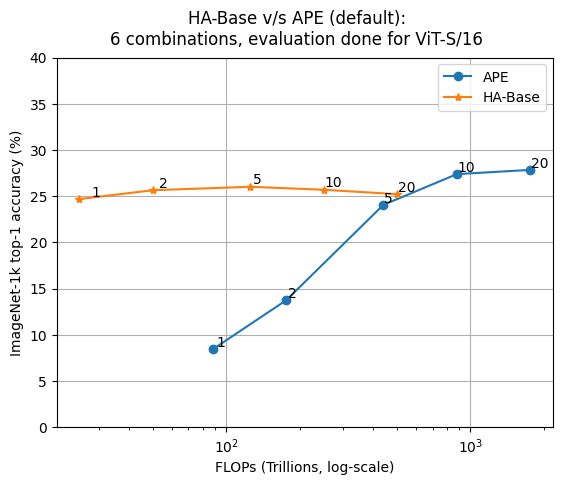

In [57]:
basic_hnet = {'exp_name': 'mm_adapt_test', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 90.78, 'cifar100': 50.96, 'imagenet1k': 24.68}, 'epoch_2': {'cifar10': 90.77, 'cifar100': 52.55, 'imagenet1k': 25.64}, 'epoch_5': {'cifar10': 90.86, 'cifar100': 53.39, 'imagenet1k': 26.01}, 'epoch_10': {'cifar10': 90.49, 'cifar100': 53.27, 'imagenet1k': 25.69}, 'epoch_20': {'cifar10': 90.0, 'cifar100': 52.91, 'imagenet1k': 25.21}}}
ape_full = {'exp_name': 'vit_small_patch16_224_sentence-t5-base', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 75.59, 'cifar100': 24.37, 'imagenet1k': 8.42}, 'epoch_2': {'cifar10': 87.18, 'cifar100': 33.79, 'imagenet1k': 13.73}, 'epoch_5': {'cifar10': 90.3, 'cifar100': 49.64, 'imagenet1k': 24.05}, 'epoch_10': {'cifar10': 89.97, 'cifar100': 54.76, 'imagenet1k': 27.38}, 'epoch_20': {'cifar10': 89.64, 'cifar100': 54.69, 'imagenet1k': 27.84}}}


benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 100]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}
epochs = [1, 2, 5, 10, 20]

fig, axes = plt.subplots(1, 1)

for j, bench in enumerate(["imagenet1k"]):
    hnet_accs = [basic_hnet["eval"][f"epoch_{e}"][bench] for e in [1, 2, 5, 10, 20]]
    hnet_flops = [25.06 * e for e in [1, 2, 5, 10, 20]]

    ape_accs = [ape_full["eval"][f"epoch_{e}"][bench] for e in [1, 2, 5, 10, 20]]
    ape_flops = [14.675 * e * 6 for e in [1, 2, 5, 10, 20]]

    axes.plot(ape_flops, ape_accs, label="APE", marker="o")
    axes.plot(hnet_flops, hnet_accs, label="HA-Base", marker="*")
    axes.set_xlabel("FLOPs (Trillions, log-scale)")
    axes.set_xscale("log")
    axes.set_ylabel(f"{names[bench]} top-1 accuracy (%)")
    axes.set_ylim([0, 40])
    # axes.set_title(names[bench])
    
    if j == 0:
        axes.legend()
    
    axes.grid(True)

    epochs = [1, 2, 5, 10, 20]
    for i, ep in enumerate(epochs):
        axes.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
        axes.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.suptitle("HA-Base v/s APE (default):\n6 combinations, evaluation done for ViT-S/16\n")

# plt.show()
plt.savefig("final_plots/ha_base_vs_ape_6.png", format="png")



### Plot for 4.2

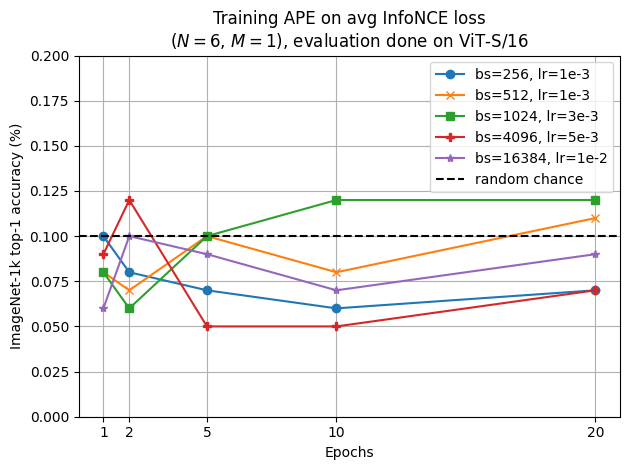

In [101]:
from pylab import plt

data_256 = {'exp_name': 'vits_bs-256_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 9.56, 'cifar100': 1.0, 'imagenet1k': 0.1}, 'epoch_2': {'cifar10': 11.61, 'cifar100': 0.82, 'imagenet1k': 0.08}, 'epoch_5': {'cifar10': 14.36, 'cifar100': 0.94, 'imagenet1k': 0.07}, 'epoch_10': {'cifar10': 14.54, 'cifar100': 0.75, 'imagenet1k': 0.06}, 'epoch_20': {'cifar10': 15.99, 'cifar100': 0.95, 'imagenet1k': 0.07}}}
data_512 = {'exp_name': 'vits_bs-512_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 20.42, 'cifar100': 1.3, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 17.43, 'cifar100': 1.33, 'imagenet1k': 0.07}, 'epoch_5': {'cifar10': 8.47, 'cifar100': 0.41, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.83, 'cifar100': 0.69, 'imagenet1k': 0.08}, 'epoch_20': {'cifar10': 12.55, 'cifar100': 1.14, 'imagenet1k': 0.11}}}
data_1024 = {'exp_name': 'vits_bs-1024_lr-0.003', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 7.83, 'cifar100': 1.45, 'imagenet1k': 0.08}, 'epoch_2': {'cifar10': 14.21, 'cifar100': 1.24, 'imagenet1k': 0.06}, 'epoch_5': {'cifar10': 10.36, 'cifar100': 0.97, 'imagenet1k': 0.1}, 'epoch_10': {'cifar10': 10.32, 'cifar100': 1.04, 'imagenet1k': 0.12}, 'epoch_20': {'cifar10': 14.24, 'cifar100': 0.75, 'imagenet1k': 0.12}}}
data_4096 = {'exp_name': 'vits_bs-4096_lr-0.005', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.08, 'cifar100': 0.3, 'imagenet1k': 0.09}, 'epoch_2': {'cifar10': 4.93, 'cifar100': 0.37, 'imagenet1k': 0.12}, 'epoch_5': {'cifar10': 10.34, 'cifar100': 0.61, 'imagenet1k': 0.05}, 'epoch_10': {'cifar10': 7.24, 'cifar100': 0.42, 'imagenet1k': 0.05}, 'epoch_20': {'cifar10': 7.05, 'cifar100': 0.6, 'imagenet1k': 0.07}}}
data_16384 = {'exp_name': 'vits_bs-16384_lr-0.001', 'seed': 0, 'eval': {'epoch_1': {'cifar10': 4.41, 'cifar100': 0.84, 'imagenet1k': 0.06}, 'epoch_2': {'cifar10': 5.15, 'cifar100': 0.67, 'imagenet1k': 0.1}, 'epoch_5': {'cifar10': 15.21, 'cifar100': 0.72, 'imagenet1k': 0.09}, 'epoch_10': {'cifar10': 13.72, 'cifar100': 1.26, 'imagenet1k': 0.07}, 'epoch_20': {'cifar10': 13.48, 'cifar100': 1.74, 'imagenet1k': 0.09}}}

epochs = [1, 2, 5, 10, 20]
benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0.0, 60.0], "cifar100": [0.0, 5.0], "imagenet1k": [0.0, 0.2]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}

for bench in ["imagenet1k"]:
    acc_256 = [data_256['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_512 = [data_512['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_1024 = [data_1024['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_4096 = [data_4096['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]
    acc_16384 = [data_16384['eval'][f'epoch_{epoch}'][bench] for epoch in epochs]

    # Create the plot
    # plt.figure(figsize=(10, 6))

    plt.plot(epochs, acc_256, marker='o', label="bs=256, lr=1e-3")
    plt.plot(epochs, acc_512, marker='x', label="bs=512, lr=1e-3")
    plt.plot(epochs, acc_1024, marker='s', label="bs=1024, lr=3e-3")
    plt.plot(epochs, acc_4096, marker='P', label="bs=4096, lr=5e-3")
    plt.plot(epochs, acc_16384, marker='*', label="bs=16384, lr=1e-2")

    plt.axhline(y=rcs[bench], color="black", linestyle="--", label="random chance")

    plt.title(f'Training APE on avg InfoNCE loss\n($N=6$, $M=1$), evaluation done on ViT-S/16')
    plt.xlabel('Epochs')
    plt.ylabel(f'{names[bench]} top-1 accuracy (%)')
    plt.ylim(lims[bench])
    plt.xticks([1, 2, 5, 10, 20])
    plt.grid(True)

    # Save and show the plot
    plt.legend()
    plt.tight_layout()
    # plt.show()
    plt.savefig('final_plots/ape_avg_6.pdf', format="pdf")

### Plot for 4.3

In [ ]:
{'vit_small_patch16_224': {'image_encoder': 'vit_small_patch16_224', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 25.26}, 'epoch_2': {'imagenet1k': 26.19}, 'epoch_5': {'imagenet1k': 26.72}, 'epoch_10': {'imagenet1k': 26.71}, 'epoch_20': {'imagenet1k': 26.77}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 0}, 'deit_small_patch16_224': {'image_encoder': 'deit_small_patch16_224', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 24.43}, 'epoch_2': {'imagenet1k': 26.21}, 'epoch_5': {'imagenet1k': 27.19}, 'epoch_10': {'imagenet1k': 27.5}, 'epoch_20': {'imagenet1k': 27.01}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 1}, 'deit3_small_patch16_224.fb_in1k': {'image_encoder': 'deit3_small_patch16_224.fb_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 31.28}, 'epoch_2': {'imagenet1k': 32.94}, 'epoch_5': {'imagenet1k': 33.83}, 'epoch_10': {'imagenet1k': 34.06}, 'epoch_20': {'imagenet1k': 33.17}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 2}, 'deit3_small_patch16_224.fb_in22k_ft_in1k': {'image_encoder': 'deit3_small_patch16_224.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 34.81}, 'epoch_2': {'imagenet1k': 36.29}, 'epoch_5': {'imagenet1k': 37.21}, 'epoch_10': {'imagenet1k': 37.49}, 'epoch_20': {'imagenet1k': 37.33}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}, 'efficientvit_m5.r224_in1k': {'image_encoder': 'efficientvit_m5.r224_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 14.78}, 'epoch_2': {'imagenet1k': 17.52}, 'epoch_5': {'imagenet1k': 20.51}, 'epoch_10': {'imagenet1k': 22.12}, 'epoch_20': {'imagenet1k': 22.72}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 4}, 'flexivit_small.300ep_in1k': {'image_encoder': 'flexivit_small.300ep_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 31.86}, 'epoch_2': {'imagenet1k': 33.39}, 'epoch_5': {'imagenet1k': 34.17}, 'epoch_10': {'imagenet1k': 34.43}, 'epoch_20': {'imagenet1k': 33.94}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 5}}


In [77]:
import numpy as np

hnet = np.array([
    [25.26, 26.19, 26.72, 26.71, 26.77],  # vit_small_patch16_224
    [24.43, 26.21, 27.19, 27.50, 27.01],  # deit_small_patch16_224
    [31.28, 32.94, 33.83, 34.06, 33.17],  # deit3_small_patch16_224.fb_in1k
    [34.81, 36.29, 37.21, 37.49, 37.33],  # deit3_small_patch16_224.fb_in22k_ft_in1k
    [14.78, 17.52, 20.51, 22.12, 22.72],  # efficientvit_m5.r224_in1k
    [31.86, 33.39, 34.17, 34.43, 33.94]   # flexivit_small.300ep_in1k
])

hnet = hnet[:, 3].argmax(axis=0)  
hnet


np.int64(3)

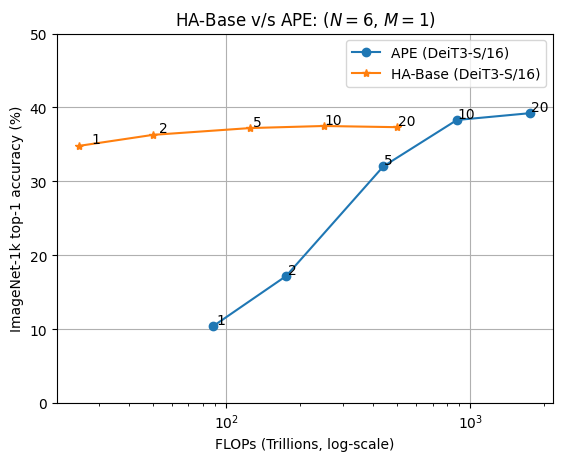

In [103]:
ape_max_data = {'deit3_small_patch16_224.fb_in22k_ft_in1k': {'image_encoder': 'deit3_small_patch16_224.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 10.37}, 'epoch_2': {'imagenet1k': 17.2}, 'epoch_5': {'imagenet1k': 32.02}, 'epoch_10': {'imagenet1k': 38.3}, 'epoch_20': {'imagenet1k': 39.23}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}}

benchmarks = ["cifar10", "cifar100", "imagenet1k"]
names = {"cifar10": "CIFAR-10", "cifar100": "CIFAR-100", "imagenet1k": "ImageNet-1k"}
lims = {"cifar10": [0, 100.0], "cifar100": [0.0, 100.0], "imagenet1k": [0.0, 100]}
rcs = {"cifar10": 10.0, "cifar100": 1.0, "imagenet1k": 0.1}
epochs = [1, 2, 5, 10, 20]

# fig, axes = plt.subplots(1, 1)

for j, bench in enumerate(["imagenet1k"]):
    hnet_accs = [34.81, 36.29, 37.21, 37.49, 37.33]
    hnet_flops = [25.06 * e for e in [1, 2, 5, 10, 20]]

    ape_accs =[10.37, 17.2, 32.03, 38.3, 39.23]
    ape_flops = [14.675 * e * 6 for e in [1, 2, 5, 10, 20]]

    plt.plot(ape_flops, ape_accs, label="APE (DeiT3-S/16)", marker="o")
    plt.plot(hnet_flops, hnet_accs, label="HA-Base (DeiT3-S/16)", marker="*")
    plt.xlabel("FLOPs (Trillions, log-scale)")
    plt.xscale("log")
    plt.ylabel(f"{names[bench]} top-1 accuracy (%)")
    plt.ylim([0, 50])
    # plt.set_title(names[bench])
    
    if j == 0:
        plt.legend()
    
    plt.grid(True)

    epochs = [1, 2, 5, 10, 20]
    for i, ep in enumerate(epochs):
        plt.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
        plt.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.title("HA-Base v/s APE: ($N=6$, $M=1$)")

plt.savefig("final_plots/ha_base_vs_ape_6.pdf", format="pdf")
plt.show()




### Plot for 4.4 (a)

In [93]:
hnet_12_4_1024 = {'vit_large_patch16_224': {'image_encoder': 'vit_large_patch16_224', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.56}, 'epoch_2': {'imagenet1k': 33.63}, 'epoch_5': {'imagenet1k': 36.73}, 'epoch_10': {'imagenet1k': 37.69}, 'epoch_20': {'imagenet1k': 37.56}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 0}, 'vit_large_patch16_224.augreg_in21k_ft_in1k': {'image_encoder': 'vit_large_patch16_224.augreg_in21k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 29.56}, 'epoch_2': {'imagenet1k': 33.63}, 'epoch_5': {'imagenet1k': 36.73}, 'epoch_10': {'imagenet1k': 37.69}, 'epoch_20': {'imagenet1k': 37.56}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 1}, 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k': {'image_encoder': 'vit_large_patch14_clip_336.laion2b_ft_in12k_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 33.63}, 'epoch_2': {'imagenet1k': 40.73}, 'epoch_5': {'imagenet1k': 45.19}, 'epoch_10': {'imagenet1k': 46.07}, 'epoch_20': {'imagenet1k': 45.42}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 2}, 'deit3_large_patch16_384.fb_in22k_ft_in1k': {'image_encoder': 'deit3_large_patch16_384.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 40.76}, 'epoch_2': {'imagenet1k': 46.63}, 'epoch_5': {'imagenet1k': 49.01}, 'epoch_10': {'imagenet1k': 49.37}, 'epoch_20': {'imagenet1k': 49.13}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}}
hnet_accs = [ [subitem["imagenet1k"] for subitem in item["eval"].values() ] for item in hnet_12_4_1024.values() ]
hnet_accs = hnet_accs[-1]

ape_12_4_1024 = {'deit3_large_patch16_384.fb_in22k_ft_in1k': {'image_encoder': 'deit3_large_patch16_384.fb_in22k_ft_in1k', 'seed': 0, 'eval': {'epoch_1': {'imagenet1k': 30.1}, 'epoch_2': {'imagenet1k': 44.8}, 'epoch_5': {'imagenet1k': 50.22}, 'epoch_10': {'imagenet1k': 50.62}, 'epoch_20': {'imagenet1k': 50.32}}, 'text_encoder': 'sentence-t5-base', 'encoder_index': 3}}
ape_accs = [item["imagenet1k"] for item in ape_12_4_1024["deit3_large_patch16_384.fb_in22k_ft_in1k"]["eval"].values()]

print(hnet_accs)
print(ape_accs)

[40.76, 46.63, 49.01, 49.37, 49.13]
[30.1, 44.8, 50.22, 50.62, 50.32]


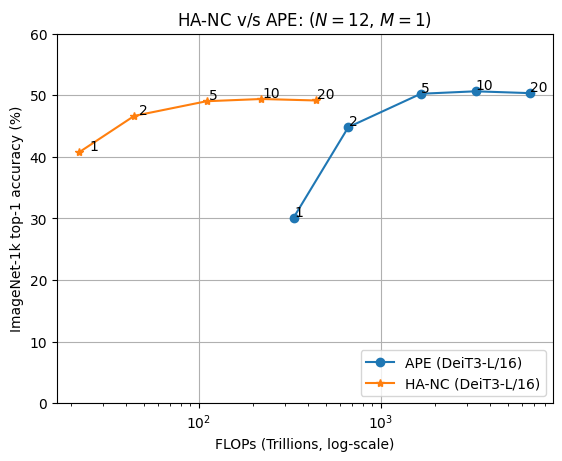

In [98]:
epochs = [1, 2, 5, 10, 20]
ape_flops = [ (4 * 14.675 + 4 * 29.352 + 4 * 39.136) * e for e in epochs]
hnet_flops = [22.165 * e for e in epochs]

plt.plot(ape_flops, ape_accs, marker="o", label="APE (DeiT3-L/16)")
plt.plot(hnet_flops, hnet_accs, marker="*", label="HA-NC (DeiT3-L/16)")

# plt.plot(ape_flops, ape_accs, label="APE (DeiT3-S/16)", marker="o")
# plt.plot(hnet_flops, hnet_accs, label="HA-Base (DeiT3-S/16)", marker="*")
plt.xlabel("FLOPs (Trillions, log-scale)")
plt.xscale("log")
plt.ylabel(f"{names[bench]} top-1 accuracy (%)")
plt.ylim([0, 60])

if j == 0:
    plt.legend(loc="lower right")

plt.grid(True)

epochs = [1, 2, 5, 10, 20]
for i, ep in enumerate(epochs):
    plt.annotate(f"{ep}", (ape_flops[i] + 3, ape_accs[i] + 0.3))
    plt.annotate(f"{ep}", (hnet_flops[i] + 3, hnet_accs[i] + 0.3))

plt.title(f"HA-NC v/s APE: ($N=12$, $M=1$)")
plt.show()

### Plot for 4.4 (b)

In [2]:
hnet_minilm = {'eval': {'epoch_1': {'imagenet1k': 38.44}, 'epoch_2': {'imagenet1k': 41.38}, 'epoch_5': {'imagenet1k': 42.36}, 'epoch_10': {'imagenet1k': 42.1}, 'epoch_20': {'imagenet1k': 41.97}}, 'text_encoder': 'all-MiniLM-L12-v2', 'encoder_index': 3}
hnet_minilm = [item["imagenet1k"] for item in hnet_minilm["eval"].values()]

hnet_roberta = {'eval': {'epoch_1': {'imagenet1k': 44.78}, 'epoch_2': {'imagenet1k': 47.8}, 'epoch_5': {'imagenet1k': 48.57}, 'epoch_10': {'imagenet1k': 47.98}, 'epoch_20': {'imagenet1k': 45.1}}, 'text_encoder': 'all-roberta-large-v1', 'encoder_index': 3}
hnet_roberta = [item["imagenet1k"] for item in hnet_roberta["eval"].values()]

ape_minilm = {'eval': {'epoch_1': {'imagenet1k': 33.0}, 'epoch_2': {'imagenet1k': 41.22}, 'epoch_5': {'imagenet1k': 43.3}, 'epoch_10': {'imagenet1k': 43.91}, 'epoch_20': {'imagenet1k': 44.34}}, 'text_encoder': 'all-MiniLM-L12-v2', 'encoder_index': 3} 
ape_minilm = [item["imagenet1k"] for item in ape_minilm["eval"].values()]

ape_roberta = 


[38.44, 41.38, 42.36, 42.1, 41.97]